In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
NPMI = pd.read_csv("NPMI_Result.txt", sep = '\t', header= None)
NPMI.columns = ['Entity_1', 'ID_1', 'Entity_2', 'ID_2', 'NPMI']
print("In the NPMI, there are {} genes and {} diseases!".format(len(set(NPMI.ID_1)), len(set(NPMI.ID_2))))
High_Result = NPMI[NPMI.NPMI >= 0].reset_index(drop=True)
High_Result.sort_values(by = "NPMI", inplace = True, ascending = False, ignore_index = True)
print("In the High NPMI, there are {} genes and {} diseases!".format(len(set(High_Result.ID_1)), len(set(High_Result.ID_2))))

In the NPMI, there are 1236 genes and 615 diseases!
In the High NPMI, there are 981 genes and 45 diseases!


In [15]:
Tree_Link = pd.read_csv("Tree_Link.txt", sep="\t", header=None)
Tree_Link.columns = ['Entity_1', 'Type_1', 'ID_1', 'Relation', 'Entity_2', 'Type_2', 'ID_2', 'Distance']
Total_Gene = len(set(Tree_Link[Tree_Link.Type_1 == "Gene"].ID_1) | set(Tree_Link[Tree_Link.Type_2 == "Gene"].ID_2))
Total_Disease = len(set(Tree_Link[Tree_Link.Type_1 == "Disease"].ID_1) | set(Tree_Link[Tree_Link.Type_2 == "Disease"].ID_2))
print("In the Tree, there are {} genes and {} diseases!".format(Total_Gene, Total_Disease))
Part_1 = Tree_Link[(Tree_Link.Type_1 == "Gene") & (Tree_Link.Type_2 == "Disease")]
Part_2 = Tree_Link[(Tree_Link.Type_2 == "Gene") & (Tree_Link.Type_1 == "Disease")]
Gene_Link_Disease = pd.concat([Part_1, Part_2])
High_Link = Gene_Link_Disease[(Gene_Link_Disease.Distance <=3) & (Gene_Link_Disease.Distance != 0)]
High_Gene = set(High_Link[High_Link.Type_1 == "Gene"].ID_1) | set(High_Link[High_Link.Type_2 == "Gene"].ID_2)
High_Disease = set(High_Link[High_Link.Type_1 == "Disease"].ID_1) | set(High_Link[High_Link.Type_2 == "Disease"].ID_2)
print("In the High Tree, there are {} genes and {} diseases!".format(len(High_Gene), len(High_Disease)))

In the Tree, there are 1171 genes and 807 diseases!
In the High Tree, there are 458 genes and 149 diseases!


In [16]:
High_Result = High_Result.groupby(['Entity_1', 'Entity_2']).size().reset_index(name="Count")
High_Result.sort_values(by = "Count", inplace = True, ascending = False, ignore_index = True)
High_Result

,Entity_1,Entity_2,Count
0,TSC,autism,8
1,TSC,ADHD,6
2,FMRP,ADHD,5
3,FMRP,ASDs,5
4,fragile X mental retardation 1,ASD,4
...,...,...,...
2814,IL-8,ASD,1
2815,IL-8,autism spectrum disorder,1
2816,IL-8,autism spectrum disorders,1
2817,IL-8,depression,1


In [17]:
High_Link = High_Link.groupby(['Entity_1', 'Entity_2']).size().reset_index(name="Count")
High_Link.sort_values(by = "Count", inplace = True, ascending = False, ignore_index = True)
High_Link

,Entity_1,Entity_2,Count
0,oxytocin,ASD,54
1,PTEN,ASD,45
2,oxytocin,autism,23
3,ASD,PTEN,20
4,SHANK3,ASD,20
...,...,...,...
1431,MSNP1AS,ASD,1
1432,MPO,GI disease,1
1433,MMP14,obesity,1
1434,MMP-9,stroke,1


In [73]:
def Calculate_Com(set_1, set_2):
    com = set_1 & set_2
    set_1_only = set_1 - com
    set_2_only = set_2 - com
    return [com, set_1_only, set_2_only]

In [86]:
Com_gene, NPMI_gene, Tree_gene = Calculate_Com(set(High_Result.ID_1),  set(High_Gene))
Com_disease, NPMI_disease, Tree_disease = Calculate_Com(set(High_Result.ID_2),  set(High_Disease))

In [87]:
print("The commen gene number is {}.".format(len(Com_gene)))
print("The number of gene only in NPMI is {}.".format(len(NPMI_gene)))
print("The number of gene only in Tree is {}.".format(len(Tree_gene)))

The commen gene number is 422.
The number of gene only in NPMI is 559.
The number of gene only in Tree is 36.


In [88]:
print("The commen disease number is {}.".format(len(Com_disease)))
print("The number of disease only in NPMI is {}.".format(len(NPMI_disease)))
print("The number of disease only in Tree is {}.".format(len(Tree_disease)))

The commen disease number is 39.
The number of disease only in NPMI is 6.
The number of disease only in Tree is 110.


In [135]:
Group = ["Gene", "Diease"]
Com = [422, 39]
NPMI_only = [599, 6]
Tree_only = [36, 110]

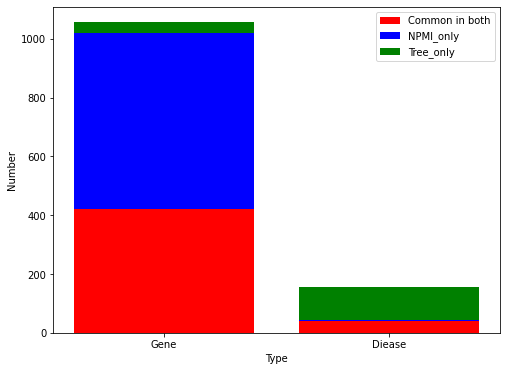

In [141]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(Group, Com, color="red", label="Common in both")
ax.bar(Group, NPMI_only, color="blue", bottom=Com, label="NPMI_only")
ax.bar(Group, Tree_only, color="green", 
       bottom=np.array(NPMI_only) + np.array(Com), label="Tree_only")
ax.set_xlabel("Type")
ax.set_ylabel("Number")
ax.legend()
fig.savefig("Bar.png", dpi = 1000)

In [131]:
def Degree(list_1, list_2):
    G_grn = nx.DiGraph()
    G_grn.add_nodes_from(set(list_1))
    G_grn.add_nodes_from(set(list_2))
    edges = [(x, y) for x, y in zip(list_1, list_2)]
    G_grn.add_edges_from(edges)
    degree =  nx.degree_histogram(G_grn)
    data = {'Degree': range(0, len(degree)), 
            'Number': degree}
    data = pd.DataFrame(data)
    return data

In [132]:
NPMI_Degree_Contribution = Degree(High_Result['ID_1'], High_Result['ID_2'])
NPMI_Degree_Contribution = NPMI_Degree_Contribution[NPMI_Degree_Contribution.Number != 0]
Tree_Degree_Contribution = Degree(High_Link['ID_1'], High_Link['ID_2'])
Tree_Degree_Contribution = Tree_Degree_Contribution[Tree_Degree_Contribution.Number != 0]

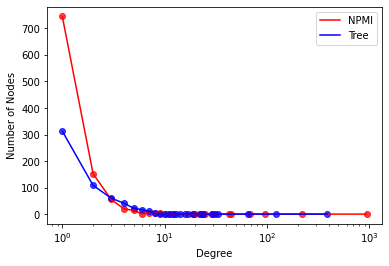

In [133]:
plt.plot(NPMI_Degree_Contribution.Degree, NPMI_Degree_Contribution.Number, 'r-', label = "NPMI")
plt.scatter(NPMI_Degree_Contribution.Degree, NPMI_Degree_Contribution.Number, alpha = 0.75, c="r")
plt.plot(Tree_Degree_Contribution.Degree, Tree_Degree_Contribution.Number, 'b-', label = "Tree")
plt.scatter(Tree_Degree_Contribution.Degree, Tree_Degree_Contribution.Number, alpha = 0.75, c="b")
plt.xscale("log")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.legend()
plt.savefig("Degree.png", dpi = 1000)

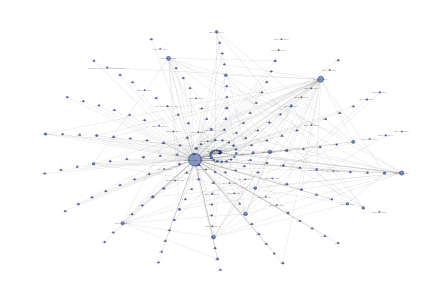

In [123]:
G_NPMI = nx.DiGraph()
G_NPMI.add_nodes_from(set(High_Result['ID_1']))
G_NPMI.add_nodes_from(set(High_Result['ID_2']))
edges = [(x, y) for x, y in zip(High_Result['ID_1'], High_Result['ID_2'])]
G_NPMI.add_edges_from(edges) 

#sorted(dict(G_NPMI.degree).items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
bet_con_NPMI = dict(nx.betweenness_centrality(G_NPMI))
bet_con_NPMI = sorted(dict(bet_con_NPMI).items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

hub = list()
for i in bet_con_NPMI[:int(len(bet_con_NPMI) * 0.2)]:
    hub.append(i[0])

k_NPMI = G_NPMI.subgraph(hub)

pos = nx.spiral_layout(k_NPMI)
sizes_node = [1 + k_NPMI.degree(v) * 1 for v in k_NPMI.nodes()] 
nx.draw(k_NPMI, pos =pos, with_labels=True, node_size=sizes_node, node_color='#113285', font_size = 2,
            edge_color='#858681', width=0.2,
            alpha=0.5, arrowsize=0.5) 
plt.savefig('./network_hub_NPMI.png', dpi = 1000)

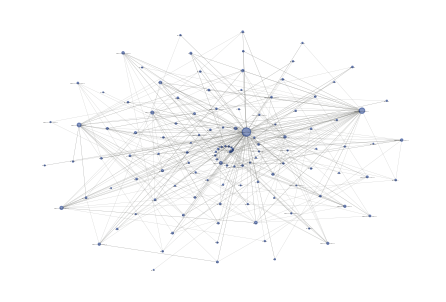

In [114]:
G_Tree = nx.DiGraph()
G_Tree.add_nodes_from(set(High_Link['ID_1']))
G_Tree.add_nodes_from(set(High_Link['ID_2']))
edges = [(x, y) for x, y in zip(High_Link['ID_1'], High_Link['ID_2'])]
G_Tree.add_edges_from(edges) 

#sorted(dict(G_NPMI.degree).items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
bet_con_Tree = dict(nx.betweenness_centrality(G_Tree))
bet_con_Tree = sorted(dict(bet_con_Tree).items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

hub = list()
for i in bet_con_Tree[:int(len(bet_con_Tree) * 0.2)]:
    hub.append(i[0])

k_Tree = G_Tree.subgraph(hub)

pos = nx.spiral_layout(k_Tree)
sizes_node = [0.5 + k_Tree.degree(v) * 0.5 for v in k_Tree.nodes()] 
sizes_color = [100 + k_Tree.degree(v) * 100 for v in k_Tree.nodes()] 
nx.draw(k_Tree, pos =pos, with_labels=True, node_size=sizes_node, node_color='#113285', font_size = 2,
            edge_color='#858681', width=0.2,
            alpha=0.5, arrowsize=0.5) 
plt.savefig('./network_hub_Tree.png', dpi = 1000)